In [ ]:
'''ライブラリの準備'''
import pickle
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [ ]:
with open('/content/drive/MyDrive/Bachelor_thisis/dataset/pic.bin', 'rb') as p:
    data = pickle.load(p)

train = data[0]
test = data[1]

train_set = train[0]
train_eval = train[1]

test_set = test[0]
test_eval = test[1]

In [ ]:
# 使用するDeviceの指定
# GPUが使用できる方はGPU, 使用できない方はCPUを使用するように設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Tensorに変換
x_train = torch.Tensor(train_set)
y_train = torch.Tensor(train_eval)
x_test = torch.Tensor(test_set)
y_test = torch.Tensor(test_eval)
# データセッを作成
ds_train = TensorDataset(x_train, y_train)
# DataLoaderを作成
train_loader = DataLoader(ds_train, batch_size=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  """


In [ ]:
'''モデルの定義'''
class Net(nn.Module):
    def __init__(self, n_vis=26, n_hid=512, n_out=81, device='cpu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_vis, n_hid)
        self.fc2 = nn.Linear(n_hid, n_out)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x
net = Net()

In [ ]:
'''最適化手法の定義'''
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

'''学習'''
losses = []
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        optimizer.zero_grad()
        loss = criterion( net(train_x), train_y )
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    losses.append(total_loss)
    print(epoch+1, ':', 'loss = ', total_loss.item())

1 : loss =  0.8805408477783203
2 : loss =  0.6911960244178772
3 : loss =  0.6341999173164368
4 : loss =  0.5878410935401917
5 : loss =  0.5455190539360046
6 : loss =  0.5047358274459839
7 : loss =  0.4682808816432953
8 : loss =  0.43619468808174133
9 : loss =  0.40518811345100403
10 : loss =  0.3765087425708771
11 : loss =  0.3500189483165741
12 : loss =  0.3248138725757599
13 : loss =  0.30157288908958435
14 : loss =  0.2788795232772827
15 : loss =  0.2576720118522644
16 : loss =  0.23786482214927673
17 : loss =  0.21828211843967438
18 : loss =  0.20020855963230133
19 : loss =  0.18398979306221008
20 : loss =  0.16889744997024536
21 : loss =  0.15538394451141357
22 : loss =  0.14305347204208374
23 : loss =  0.13241015374660492
24 : loss =  0.1225152313709259
25 : loss =  0.11337361484766006
26 : loss =  0.10520670562982559
27 : loss =  0.09723452478647232
28 : loss =  0.08982382714748383
29 : loss =  0.08278012275695801
30 : loss =  0.07672151923179626
31 : loss =  0.0717150941491127


In [ ]:
## save model

model_path = '/content/drive/MyDrive/Bachelor_thisis/NN/nn4_apply.pt'
torch.save(net, model_path)

In [ ]:
epoch_num = []
for i in range(epoch+1):
    epoch_num.append(i+1)

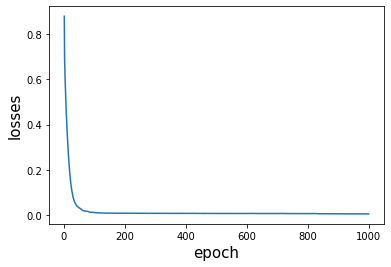

In [ ]:
fig, ax = plt.subplots()
ax.plot(epoch_num, losses)
ax.set_xlabel('epoch')
ax.set_ylabel('losses')
ax.set_xlabel('epoch', fontsize=15)
ax.set_ylabel('losses', fontsize=15)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)

In [ ]:
net = net.eval()

In [ ]:
pred = net(x_test)

In [ ]:
max_diff_list = []

In [ ]:
for i in range(len(y_test)):
    teach_data = y_test[i].detach().cpu().numpy()
    pred_data = pred[i].detach().cpu().numpy()

    data_diff = np.round(np.abs(teach_data - pred_data), 2)
    max_diff = np.max(data_diff)
    max_diff_list.append(max_diff)

In [ ]:
max_diff_array = np.array(max_diff_list)
total_max_diff = np.max(max_diff_array)
max_idx = np.argmax(max_diff_array)

print('total_max_diff = ', total_max_diff)
print('max_idx = ', max_idx)

total_max_diff =  0.12
max_idx =  91


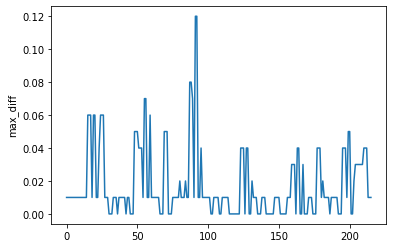

In [ ]:
x = np.arange(0, len(max_diff_array))
y = max_diff_array

plt.ylabel("max_diff")

plt.plot(x, y)
plt.show()

In [ ]:
print(max_diff_list)

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.06, 0.06, 0.06, 0.01, 0.06, 0.06, 0.01, 0.01, 0.04, 0.06, 0.06, 0.06, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.01, 0.01, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.01, 0.07, 0.07, 0.01, 0.01, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.08, 0.08, 0.07, 0.01, 0.12, 0.12, 0.01, 0.01, 0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.04, 0.04, 0.0, 0.04, 0.04, 0.0, 0.0, 0.02, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.0, 0.04, 0.04, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0,

In [ ]:
teach_data = y_test[max_idx].detach().cpu().numpy()
pred_data = pred[max_idx].detach().cpu().numpy()

In [ ]:
x1_axis = [i for i in range(len(y_train[0]+1))]
x2_axis = [i+0.5 for i in range(len(pred[0] + 1))]

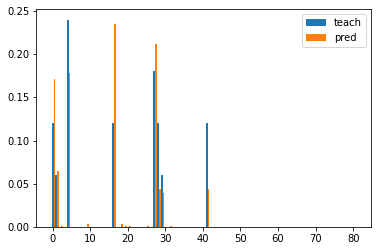

In [ ]:
plt.bar(x1_axis, teach_data, width=0.5, label='teach')
plt.bar(x2_axis, pred_data, width=0.5, label='pred')

plt.legend()
plt.show()